In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../neuro_replay'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from helper import latent_models, latent_grid
from visualize import plot_latent_boundary

In [4]:
from matplotlib import rcParams
plt.style.use('seaborn-white')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Georgia'

In [5]:
trial_info = np.load('/Users/linggeli/neuroscience/data/trial_info.npy')
latent = np.load('/Users/linggeli/neuroscience/latent/latent_layer_new_210.npy')

In [6]:
rat_correct = trial_info[:, 0] == 1
in_sequence = trial_info[:, 1] == 1
not_odor_e = trial_info[:, 3] < 5
select = rat_correct & in_sequence & not_odor_e

In [7]:
target = trial_info[select, 3] - 1

In [8]:
print(target.shape)
print(latent.shape)

(168,)
(168, 18, 10)


In [9]:
pca, clf = latent_models(latent, target, 11)

In [10]:
xx, yy, Z = latent_grid(latent, pca, clf)

In [11]:
time_stride = 20
time_scale = 25
time_unit = 10
start_time = -2000

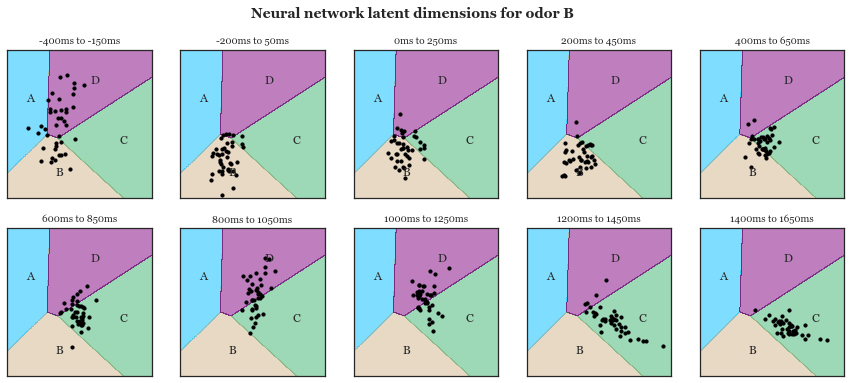

In [12]:
odor_latent = latent[target == 1, :, :]

fig = plt.figure(figsize=(15, 6))
for i in range(10):
    time_index = i + 8
    current_latent = pca.transform(odor_latent[:, time_index, :])
    
    plt.subplot(2, 5, i + 1)
    
    plot_latent_boundary(xx, yy, Z)
        
    plt.scatter(current_latent[:, 0], current_latent[:, 1], alpha=1.0, s=10, c='black')
    
    current_start = time_index * time_stride * time_unit + start_time
    current_end = (time_index * time_stride + time_scale) * time_unit + start_time
    plt.title('{start}ms to {end}ms'.format(start=current_start, end=current_end), fontsize=10)
    
plt.suptitle('Neural network latent dimensions for odor B', fontsize=14, fontweight='bold')
#plt.savefig('/Users/linggeli/Desktop/latent_B_new.png', dpi=300)
plt.show()

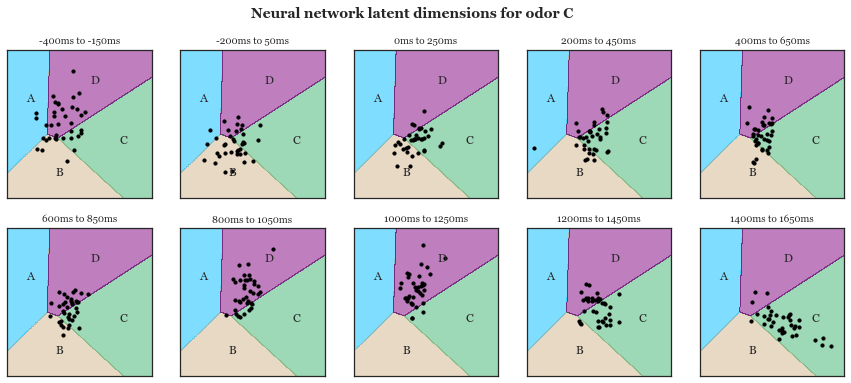

In [13]:
odor_latent = latent[target == 2, :, :]

fig = plt.figure(figsize=(15, 6))
for i in range(10):
    time_index = i + 8
    current_latent = pca.transform(odor_latent[:, time_index, :])
    
    plt.subplot(2, 5, i + 1)
    
    plot_latent_boundary(xx, yy, Z)
        
    plt.scatter(current_latent[:, 0], current_latent[:, 1], alpha=1.0, s=10, c='black')
    
    current_start = time_index * time_stride * time_unit + start_time
    current_end = (time_index * time_stride + time_scale) * time_unit + start_time
    plt.title('{start}ms to {end}ms'.format(start=current_start, end=current_end), fontsize=10)
    
plt.suptitle('Neural network latent dimensions for odor C', fontsize=14, fontweight='bold')
#plt.savefig('/Users/linggeli/Desktop/latent_C_new.png', dpi=300)
plt.show()